In [1]:
####Training the network

<IPython.core.display.Javascript object>


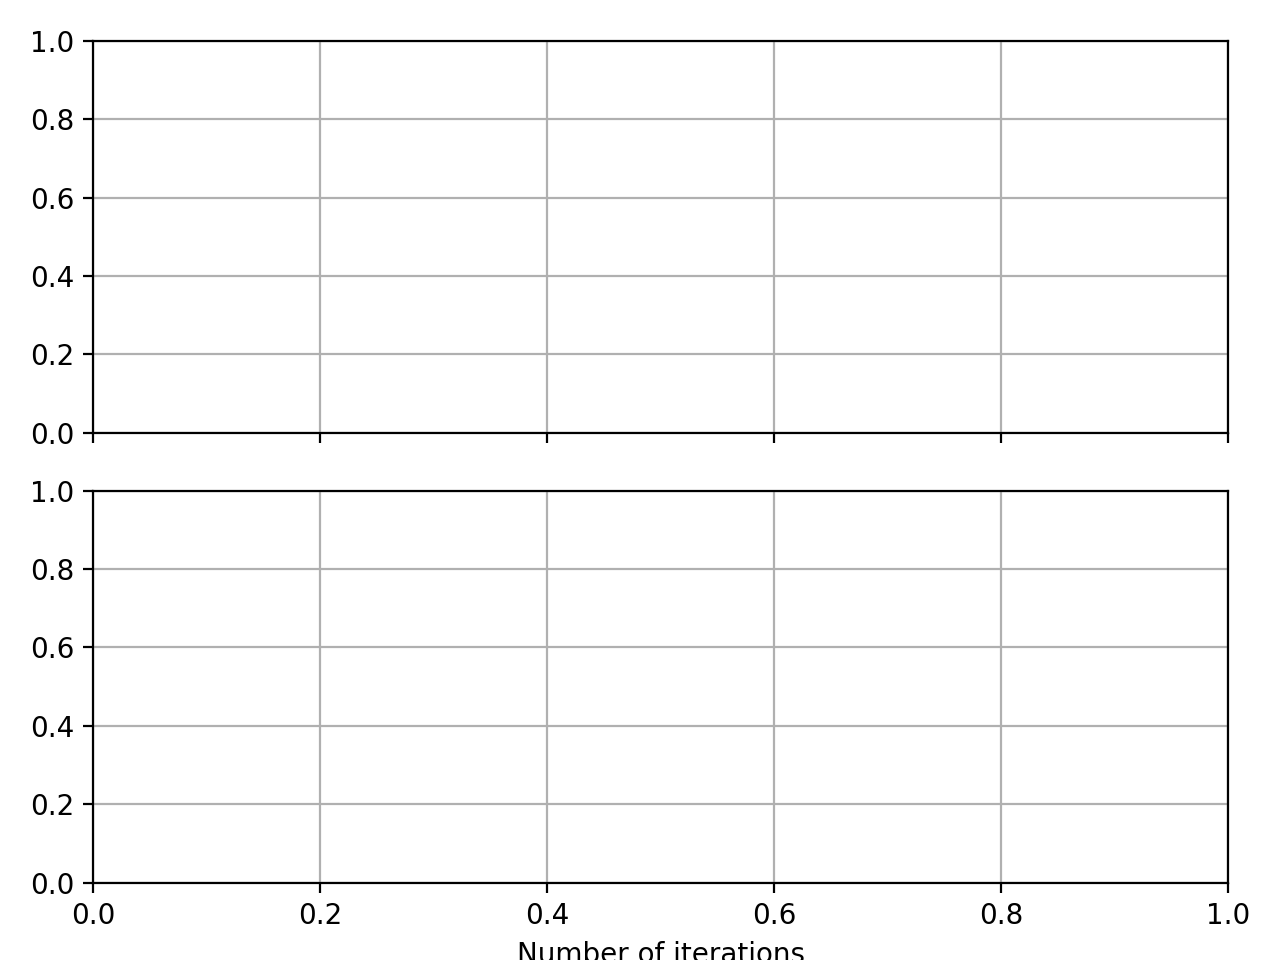

In [2]:
from liveplot import create_plot
try:
    from jupyterthemes import jtplot
    jtplot.style()
except:
    ImportError
%matplotlib notebook
import matplotlib.pyplot as plt
plotter, fig, ax = create_plot(["loss", "accuracy"], refresh=5);

In [4]:
from mynn.initializers.normal import normal
from mynn.layers.dense import dense
import numpy as np
from mynn.optimizers.adam import Adam
from mygrad.nnet.losses import margin_ranking_loss 
###Our model class
class Model:
    def __init__(self):
        """
        Creates the dense layers
        """
        ##Creates a new dense thing and has the weights become the picture_dense layer
        self.picture_dense=dense(512, 50, weight_initializer= normal, bias=False)
        weights=np.load("picture_dense.npy")
        self.picture_dense.weight.data=weights
    def __call__(self, features):
        """
        Neural Network that uses the dense layer to matrix multiply to pic_fifty
        Parameters: 
            features: (1, 512) array of resnet features
        Returns:
            pic_fifty: (1, 50) array from the dense layers with the weights
        """
        pic_fifty=self.picture_dense(features)
        return pic_fifty
    def weights(self):
        weights=self.picture_dense.weight.data
        return weights
    @property
    def parameters(self):
        params = []
        for layer in (self.picture_dense):
            params += list(layer.parameters)
        return params
def margin_ranking_loss(prediction,truth,margin):
    return margin_ranking_loss(prediction,truth,1,margin)
def training():
    model=Model()
    plot_every = 500
    optim = Adam(model.parameters)
    for epoch_cnt in range(plot_every):
        for batch_cnt in range(0, 200):
            """
            This is where Eden then Micheal's code will go
            """
            # compute the predictions for this batch by calling on model
            prediction = model(resnet_features)

            # compute the true (a.k.a desired) values for this batch: 

            # compute the loss associated with our predictions(use softmax_cross_entropy)
            loss = margin_ranking_loss(prediction, truth)

            # back-propagate through your computational graph through your loss
            loss.backward()

            # compute the accuracy between the prediction and the truth 
            acc = np.argmax(prediction) == truth

            # execute gradient descent by calling step() of optim
            optim.step()
            weights=model.weights()
            np.save("picture_dense.npy", weights)

            # null your gradients (please!)
            loss.null_gradients()

            # set the training loss and accuracy
            plotter.set_train_batch({"loss" : loss.item(),
                                     "accuracy" : acc},
                                     batch_size=1,plot=False)

        # Here, we evaluate our model on batches of *testing* data
        # this will show us how good our model does on data that 
        # it has never encountered
        # Iterate over batches of *testing* data

        # this tells liveplot to plot the epoch-level train/test statistics :)
        plotter.plot_train_epoch()